In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats

# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

In [2]:
import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *

random.seed(123)
np.random.seed(123)


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10f57f240>}


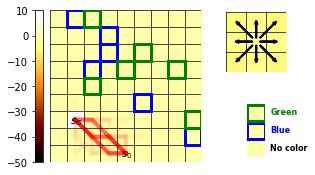

In [3]:
blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

In [4]:
#nominal_matrix = []  
#worlds = []  

#temp_matrix, avg_length, avg_reward, avg_reward_n, avg_violated, counters = count_states(demo_n.trajectories, learned_mdp, n_cfg.mdp, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})
#nominal_matrix.append({0: {'temp_matrix': temp_matrix, 'demo': demo_n, 'avg_length': avg_length, 'avg_reward':avg_reward, 'avg_reward_n':avg_reward_n, 'avg_violated': avg_violated, 'counters':counters}})
#worlds.append({'n': n_cfg,'c': c_cfg,'learned_params': learned_params,'learned_mdp': learned_mdp, \
#                       'demo_n': demo_n, 'demo_c': demo_c, 'demo_l': demo_l, 'constraints': {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}})

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10f57f240>}


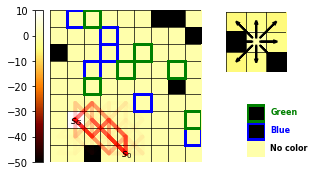

In [5]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

In [6]:
#constrained_matrix = []  

#temp_matrix, avg_length, avg_reward, avg_reward_n, avg_violated, counters = count_states(demo_c.trajectories, learned_mdp, n_cfg.mdp, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})
#constrained_matrix.append({0: {'temp_matrix': temp_matrix, 'demo': demo_c, 'avg_length': avg_length, 'avg_reward':avg_reward, 'avg_reward_n':avg_reward_n, 'avg_violated': avg_violated, 'counters':counters}})


In [7]:
#learned_params = G.learn_constraints(n.reward, c.world, c.terminal, demo_c.trajectories)
#learned_mdp = G.MDP(c.world, learned_params.reward, c.terminal, c.start)
#demo_l = G.generate_trajectories(c.world, learned_params.reward, c.start, c.terminal)

#f1 = G.plot_world(f'Learned', learned_mdp, learned_params.state_weights, 
#              learned_params.action_weights, learned_params.color_weights, 
#              demo_l, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [8]:
#learned_matrix = []  

#temp_matrix, avg_length, avg_reward, avg_reward_n, avg_violated, counters = count_states(demo_l.trajectories, learned_mdp, n_cfg.mdp, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})
#learned_matrix.append({0: {'temp_matrix': temp_matrix, 'demo': demo_l, 'avg_length': avg_length, 'avg_reward':avg_reward, 'avg_reward_n':avg_reward_n, 'avg_violated': avg_violated, 'counters':counters}})


In [9]:
from mc.self import *
#print(demo_c.trajectories)
modelSelf = ModelSelf(n, c, demo_c)

In [10]:
from mc.system1 import *

s1 = System1Solver()


In [11]:
from mc.system2 import *

s2 = System2Solver()
s2.policy(modelSelf, 0)

2

In [12]:
from mc.mca import *
from max_ent.algorithms.gridworld_icrl import Demonstration

mca = MCA(s1,s2,modelSelf, n_tra_threshold=100)

demo_mca = mca.generate_trajectories(100)


#demo_mca = Demonstration(demo_mca, s1.policy)

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.28427

/Users/aloreggia/Documents/GitHub/wmca/mc/self.py:105: RuntimeWarning: divide by zero encountered in double_scalars
  confidence = r / np.std(temp_list)


state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.28427

state: 4 	 action: 4 	 {'tot_trj': 125, -10.970562748477143: 50, -20.627416997969522: 1, -9.31370849898476: 1, -10.970562748477139: 27, -16.627416997969522: 6, -22.2842712474619: 1, -26.284271247461902: 2, -14.970562748477139: 3, -6.970562748477142: 5, -16.62741699796952: 2, -37.59797974644667: 1, -26.2842712474619: 4, -22.284271247461902: 1, -33.59797974644667: 2, -18.284271247461902: 3, -30.2842712474619: 1, -12.627416997969522: 1, -59.31370849898477: 2, -126.28427124746192: 1, -38.2842712474619: 3, -20.62741699796952: 2, -27.94112549695428: 2, -70.62741699796952: 1, -66.62741699796953: 1, -35.941125496954285: 1, -64.97056274847715: 1}
templist: [-4.388225099390857, -0.16501933598375618, -0.07450966799187808, -2.369641553671062, -0.7981160159025371, -0.1782741699796952, -0.42054833995939045, -0.35929350596345133, -0.2788225099390857, -0.2660386719675123, -0.3007838379715734, -0.8410966799187808, -0.17827416997969522, -0.5375676759431467, -0.43882250993908567, -0.2422741699796952, -0.

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.28427

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 3 	 {'tot_trj': 132, -18.97056274847714: 2, -26.284271247461902: 1, -14.970562748477139: 4, -30.2842712474619: 1, -38.28427124746191: 2, -26.2842712474619: 1, -240.62741699796948: 57, -20.62741699796952: 2, -69.31370849898477: 17, -154.9705627484771: 36, -54.2842

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.28427

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2}
templist: [-6.7969790941651835, -1.0310088450259316, -0.9688813585852999, -1.1620835678851242, -1.3452663259545339, -0.8136175406781054, -0.36146558691238084, -0.5713972010317804, -0.24222033964632503, -0.5353786303906417, -0.6074157716729192, -0.3471861467060248, -0.10123596194548652, -0.39066440757559007, -1.4124035380103728]

state: 4 	 action: 2 	 {'tot_trj': 92, -10.970562748477139: 57, -18.97056274847714: 5, -22.28427

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 93, -10.970562748477139: 57, -18.97056274847714: 5, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 5, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1}
templist: [-6.72389329745373, -1.0199227284127494, -0.9584632794607268, -1.1495880456498004, -1.3308010966431947, -0.8048689649718892, -0.3575788601713875, -0.5652531451067075, -0.23961581986518174, -0.5296218709240756, -0.6008844192893394, -0.3434529623328417, -0.10014740321488988, -0.38646371502101384, -1.397216403193057, -1.1895421182577368]

state: 4 	 action: 2 	 {'tot_trj': 93, -10.970562748477

state: 11 	 action: 4 	 {'tot_trj': 118, -10.970562748477143: 15, -10.970562748477139: 59, -18.97056274847714: 3, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 4, -26.2842712474619: 4, -16.62741699796952: 2, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1}
templist: [-1.3945630612470945, -5.4852813742385695, -0.48230244275789336, -0.28182062708422917, -0.7553990253376914, -0.9060312563172156, -0.17721769699518156, -0.8740430931343017, -0.5074767033382082, -0.8909922456766746, -0.2818206270842291, -0.2087069237116061, -0.5132927330078287, -0.10701200845736883, -0.15495145124967713, -1.0053170932031317, -2.1404113770756257, -0.27068750421147697, -0.5

state: 30 	 action: 3 	 {'tot_trj': 2, -26.2842712474619: 1, -20.62741699796952: 1}
templist: [-13.14213562373095, -10.31370849898476]

state: 30 	 action: 3 	 {'tot_trj': 2, -26.2842712474619: 1, -20.62741699796952: 1}
templist: [-13.14213562373095, -10.31370849898476]

state: 30 	 action: 6 	 {'tot_trj': 3, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1}
templist: [-12.76142374915397, -6.87580566598984, -5.771236166328253]

state: 30 	 action: 6 	 {'tot_trj': 3, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1}
templist: [-12.76142374915397, -6.87580566598984, -5.771236166328253]

state: 20 	 action: 2 	 {'tot_trj': 22, -20.627416997969522: 1, -10.970562748477143: 16, -106.91168824543144: 1, -26.2842712474619: 1, -16.627416997969522: 1, -35.941125496954285: 1, -20.62741699796952: 1}
templist: [-0.9376098635440692, -7.978591089801558, -4.8596221929741565, -1.194739602157359, -0.7557916817258874, -1.6336875225888312, -0.937609863544069]

state: 2

state: 13 	 action: 2 	 {'tot_trj': 18, -18.97056274847714: 1, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1}
templist: [-1.0539201526931743, -2.126903958192328, -36.875805665989844, -0.9618726943880422, -4.21895141649746, -16.380711874576985, -2.831697930470953]

state: 13 	 action: 2 	 {'tot_trj': 18, -18.97056274847714: 1, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1}
templist: [-1.0539201526931743, -2.126903958192328, -36.875805665989844, -0.9618726943880422, -4.21895141649746, -16.380711874576985, -2.831697930470953]

state: 13 	 action: 4 	 {'tot_trj': 71, -10.970562748477139: 40, -18.97056274847714: 2, -22.2842712474619: 4, -106.91168824543144: 1, -14.970562748477139: 4, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -20.62741699796952: 5, -18.284271247461902: 1, -27.94112549

state: 31 	 action: 4 	 {'tot_trj': 2, -106.91168824543144: 1, -26.2842712474619: 1}
templist: [-53.45584412271572, -13.14213562373095]

state: 31 	 action: 4 	 {'tot_trj': 2, -106.91168824543144: 1, -26.2842712474619: 1}
templist: [-53.45584412271572, -13.14213562373095]

state: 31 	 action: 6 	 {'tot_trj': 7, -20.62741699796952: 2, -37.59797974644667: 1, -22.2842712474619: 3, -52.62741699796953: 1}
templist: [-5.893547713705577, -5.371139963778096, -9.550401963197956, -7.518202428281362]

state: 31 	 action: 6 	 {'tot_trj': 7, -20.62741699796952: 2, -37.59797974644667: 1, -22.2842712474619: 3, -52.62741699796953: 1}
templist: [-5.893547713705577, -5.371139963778096, -9.550401963197956, -7.518202428281362]

state: 21 	 action: 4 	 {'tot_trj': 45, -10.970562748477139: 25, -14.970562748477139: 2, -20.62741699796952: 3, -16.62741699796952: 1, -26.2842712474619: 1, -37.59797974644667: 1, -22.284271247461902: 1, -22.2842712474619: 2, -18.284271247461902: 1, -27.94112549695428: 1, -240.6274

state: 13 	 action: 2 	 {'tot_trj': 25, -18.97056274847714: 2, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1}
templist: [-1.517645019878171, -1.5313708498984764, -26.55058007951269, -0.6925483399593904, -3.0376450198781715, -11.79411254969543, -2.038822509939086, -10.525483399593906, -5.238822509939085]

state: 13 	 action: 2 	 {'tot_trj': 25, -18.97056274847714: 2, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1}
templist: [-1.517645019878171, -1.5313708498984764, -26.55058007951269, -0.6925483399593904, -3.0376450198781715, -11.79411254969543, -2.038822509939086, -10.525483399593906, -5.238822509939085]

state: 13 	 action: 4 	 {'tot_trj': 71, -10.970562748477139: 40, -18.97056274847714: 2, -22.2842712474619: 4, -1

state: 29 	 action: 6 	 {'tot_trj': 64, -10.970562748477139: 25, -20.627416997969522: 1, -10.970562748477143: 15, -106.91168824543144: 1, -14.970562748477139: 1, -20.62741699796952: 3, -16.62741699796952: 1, -37.59797974644667: 1, -22.284271247461902: 1, -18.284271247461902: 1, -22.2842712474619: 2, -27.94112549695428: 1, -26.2842712474619: 1, -16.627416997969522: 1, -240.62741699796948: 1, -154.9705627484771: 1, -54.284271247461916: 1, -562.9705627484773: 1, -110.62741699796953: 1, -52.62741699796953: 1, -130.9705627484771: 1, -18.97056274847714: 1, -55.9411254969543: 1}
templist: [-4.285376073623882, -0.3223033905932738, -2.5712256441743304, -1.6704951288348662, -0.2339150429449553, -0.9669101717798212, -0.25980339059327373, -0.5874684335382292, -0.3481917382415922, -0.2856917382415922, -0.6963834764831843, -0.43658008588991065, -0.41069173824159216, -0.2598033905932738, -3.759803390593273, -2.421415042944955, -0.8481917382415924, -8.796415042944957, -1.728553390593274, -0.8223033905

state: 4 	 action: 6 	 {'tot_trj': 2, -16.62741699796952: 1, -16.627416997969522: 1}
templist: [-8.31370849898476, -8.313708498984761]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 102, -10.970562748477139: 57, -18.97056274847714: 6, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 7, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1}
templist: [-6.130608594737224, -1.115915455792773, -0.8738929900965451, -1.0481538063277591, -1.2133774704687954, -1.027391561169

state: 11 	 action: 4 	 {'tot_trj': 124, -10.970562748477143: 15, -10.970562748477139: 59, -18.97056274847714: 3, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 5, -26.2842712474619: 4, -16.62741699796952: 2, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2}
templist: [-1.3270842034448156, -5.2198645335496066, -0.45896522778573723, -0.26818414512854066, -0.7188474595955451, -0.8621910342373503, -0.168642647140576, -0.8317506854019967, -0.603651723728917, -0.8478797176600612, -0.2681841451285406, -0.19860820159652837, -0.48845598786228867, -0.10183400804814131

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 105, -10.970562748477139: 59, -18.97056274847714: 7, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 7, -16.62741699796952: 2, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1}
templist: [-6.164411449144297, -1.2647041832318093, -0.8489246189509294, -1.0182065547183947, -1.1787095427411154, -0.9980375165651425, -0.31671270472322893, -0.500652785665941, -0.2122311547377324, -0.4690936571041813, -0.5322119142277006, -0.3042011952090884, -0.

state: 13 	 action: 6 	 {'tot_trj': 34, -10.970562748477139: 22, -22.2842712474619: 1, -20.62741699796952: 1, -37.59797974644667: 1, -16.62741699796952: 1, -33.59797974644667: 1, -27.94112549695428: 1, -35.941125496954285: 1, -14.970562748477139: 2, -64.97056274847715: 1, -18.97056274847714: 1, -248.62741699796948: 1}
templist: [-7.098599425485207, -0.6554197425724088, -0.6066887352343976, -1.1058229337190197, -0.4890416764108682, -0.9881758748954903, -0.8217978087339495, -1.0570919263810084, -0.8806213381457141, -1.910898904366975, -0.5579577278963864, -7.312571088175573]

state: 3 	 action: 4 	 {'tot_trj': 50, -10.970562748477139: 26, -16.627416997969522: 2, -22.2842712474619: 2, -6.970562748477142: 2, -20.62741699796952: 1, -16.62741699796952: 1, -22.284271247461902: 1, -33.59797974644667: 1, -24.62741699796952: 1, -12.627416997969522: 1, -14.970562748477139: 3, -26.2842712474619: 1, -27.94112549695428: 1, -66.62741699796953: 1, -64.97056274847715: 1, -18.97056274847714: 1, -69.3137

state: 11 	 action: 4 	 {'tot_trj': 131, -10.970562748477143: 15, -10.970562748477139: 65, -18.97056274847714: 4, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 5, -26.2842712474619: 4, -16.62741699796952: 2, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2}
templist: [-1.2561713070775355, -5.443408997335985, -0.5792538243809814, -0.2538536946254889, -0.6804357632812793, -0.8161197575987132, -0.15963120798039254, -0.787305992288913, -0.5713955247510358, -0.8025731678614321, -0.25385369462548885, -0.18799554960282075, -0.46235528622079236, -0.09639249616770627

state: 11 	 action: 4 	 {'tot_trj': 136, -10.970562748477143: 15, -10.970562748477139: 69, -18.97056274847714: 4, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 2, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2}
templist: [-1.2099885384349789, -5.565947276800901, -0.5579577278963864, -0.24452083820543416, -0.6554197425724088, -0.7861153547458194, -0.15376241356934872, -0.758360919042997, -0.6604660036092855, -0.7730668013959382, -0.2445208382054341, -0.18108394851448176, -0.4453569301097338, -0.09284865439683472,

state: 11 	 action: 4 	 {'tot_trj': 138, -10.970562748477143: 15, -10.970562748477139: 70, -18.97056274847714: 4, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 2, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2, -63.31370849898477: 1}
templist: [-1.192452472660559, -5.564778205749273, -0.5498713840138301, -0.24097705794158727, -0.6459209057235333, -0.7747223785900829, -0.15153397279298134, -0.7473701810858522, -0.6508940325424843, -0.7618629347090405, -0.24097705794158722, -0.17845954346354723, -0.438902481847273

state: 11 	 action: 4 	 {'tot_trj': 144, -10.970562748477143: 15, -10.970562748477139: 73, -18.97056274847714: 4, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 3, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2, -63.31370849898477: 1, -86.62741699796952: 2}
templist: [-1.1427669529663689, -5.561465837769661, -0.5269600763465871, -0.23093634719402115, -0.6190075346517194, -0.7424422794821628, -0.14522005725994047, -0.7162297568739416, -0.6237734478532142, -0.7301186457628305, -0.3464045207910316, -0.17102372915256

state: 11 	 action: 4 	 {'tot_trj': 148, -10.970562748477143: 15, -10.970562748477139: 77, -18.97056274847714: 4, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 3, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2, -63.31370849898477: 1, -86.62741699796952: 2}
templist: [-1.1118813596429538, -5.70765764616716, -0.5127179121210037, -0.22469482429688545, -0.602277601282754, -0.7223762719285908, -0.14129519084750963, -0.6968721958773485, -0.6069147060193435, -0.7103857093908621, -0.3370422364453281, -0.1664014662024967

state: 13 	 action: 2 	 {'tot_trj': 37, -18.97056274847714: 4, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1, -55.9411254969543: 4, -78.62741699796952: 1, -46.28427124746191: 3, -86.62741699796952: 2}
templist: [-2.050871648484015, -1.0347100337151867, -17.93958113480587, -0.4679380675401286, -2.052462851269034, -7.968994966010426, -1.3775827769858688, -7.111813107833721, -3.53974493914803, -6.047689242913978, -2.1250653242694466, -3.7527787497942087, -4.682563080971326]

state: 13 	 action: 2 	 {'tot_trj': 37, -18.97056274847714: 4, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1, -55.9411254969543: 4, -78.62741699796952: 1, -46.28427124746191: 3, -86.62741699796952: 2}
templist: [-2.050871648484015, -1.034710033715

state: 13 	 action: 2 	 {'tot_trj': 37, -18.97056274847714: 4, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1, -55.9411254969543: 4, -78.62741699796952: 1, -46.28427124746191: 3, -86.62741699796952: 2}
templist: [-2.050871648484015, -1.0347100337151867, -17.93958113480587, -0.4679380675401286, -2.052462851269034, -7.968994966010426, -1.3775827769858688, -7.111813107833721, -3.53974493914803, -6.047689242913978, -2.1250653242694466, -3.7527787497942087, -4.682563080971326]

state: 13 	 action: 2 	 {'tot_trj': 37, -18.97056274847714: 4, -38.28427124746191: 1, -110.62741699796953: 6, -17.31370849898476: 1, -25.31370849898476: 3, -58.97056274847715: 5, -50.97056274847715: 1, -52.62741699796953: 5, -130.9705627484771: 1, -55.9411254969543: 4, -78.62741699796952: 1, -46.28427124746191: 3, -86.62741699796952: 2}
templist: [-2.050871648484015, -1.034710033715

state: 30 	 action: 3 	 {'tot_trj': 4, -26.2842712474619: 1, -20.62741699796952: 1, -18.97056274847714: 1, -169.254833995939: 1}
templist: [-6.571067811865475, -5.15685424949238, -4.742640687119285, -42.31370849898475]

state: 30 	 action: 3 	 {'tot_trj': 4, -26.2842712474619: 1, -20.62741699796952: 1, -18.97056274847714: 1, -169.254833995939: 1}
templist: [-6.571067811865475, -5.15685424949238, -4.742640687119285, -42.31370849898475]

state: 30 	 action: 6 	 {'tot_trj': 8, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1, -58.97056274847715: 1, -78.62741699796952: 1, -18.97056274847714: 2, -86.62741699796952: 1}
templist: [-4.785533905932739, -2.57842712474619, -2.164213562373095, -7.371320343559644, -9.82842712474619, -4.742640687119285, -10.82842712474619]

state: 30 	 action: 6 	 {'tot_trj': 8, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1, -58.97056274847715: 1, -78.62741699796952: 1, -18.97056274847714: 2, -86.62741699796952: 1}
templist: 

state: 30 	 action: 3 	 {'tot_trj': 4, -26.2842712474619: 1, -20.62741699796952: 1, -18.97056274847714: 1, -169.254833995939: 1}
templist: [-6.571067811865475, -5.15685424949238, -4.742640687119285, -42.31370849898475]

state: 30 	 action: 3 	 {'tot_trj': 4, -26.2842712474619: 1, -20.62741699796952: 1, -18.97056274847714: 1, -169.254833995939: 1}
templist: [-6.571067811865475, -5.15685424949238, -4.742640687119285, -42.31370849898475]

state: 30 	 action: 6 	 {'tot_trj': 9, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1, -58.97056274847715: 1, -78.62741699796952: 1, -18.97056274847714: 2, -86.62741699796952: 1, -38.97056274847715: 1}
templist: [-4.253807916384656, -2.291935221996613, -1.9237453887760845, -6.552284749830794, -8.736379666441058, -4.215680610772697, -9.625268555329946, -4.330062527608572]

state: 30 	 action: 6 	 {'tot_trj': 9, -38.28427124746191: 1, -20.62741699796952: 1, -17.31370849898476: 1, -58.97056274847715: 1, -78.62741699796952: 1, -18.970562

state: 5 	 action: 4 	 {'tot_trj': 15, -22.2842712474619: 1, -20.62741699796952: 3, -18.284271247461902: 1, -31.94112549695428: 2, -38.28427124746191: 1, -27.94112549695428: 2, -240.62741699796948: 1, -58.97056274847715: 1, -50.97056274847715: 1, -55.9411254969543: 1, -16.62741699796952: 1}
templist: [-1.4856180831641266, -4.125483399593904, -1.2189514164974602, -4.2588167329272375, -2.552284749830794, -3.7254833995939043, -16.04182779986463, -3.9313708498984767, -3.3980375165651435, -3.72940836646362, -1.1084944665313012]

state: 5 	 action: 4 	 {'tot_trj': 15, -22.2842712474619: 1, -20.62741699796952: 3, -18.284271247461902: 1, -31.94112549695428: 2, -38.28427124746191: 1, -27.94112549695428: 2, -240.62741699796948: 1, -58.97056274847715: 1, -50.97056274847715: 1, -55.9411254969543: 1, -16.62741699796952: 1}
templist: [-1.4856180831641266, -4.125483399593904, -1.2189514164974602, -4.2588167329272375, -2.552284749830794, -3.7254833995939043, -16.04182779986463, -3.9313708498984767, -3

state: 12 	 action: 1 	 {'tot_trj': 12, -37.59797974644667: 1, -16.62741699796952: 1, -154.9705627484771: 1, -110.62741699796953: 2, -52.62741699796953: 1, -46.28427124746191: 2, -63.31370849898477: 1, -169.254833995939: 1, -32.627416997969526: 1, -112.62741699796953: 1}
templist: [-3.1331649788705556, -1.3856180831641265, -12.914213562373092, -18.437902832994922, -4.385618083164128, -7.714045207910318, -5.2761423749153975, -14.104569499661585, -2.7189514164974606, -9.385618083164127]

state: 12 	 action: 1 	 {'tot_trj': 12, -37.59797974644667: 1, -16.62741699796952: 1, -154.9705627484771: 1, -110.62741699796953: 2, -52.62741699796953: 1, -46.28427124746191: 2, -63.31370849898477: 1, -169.254833995939: 1, -32.627416997969526: 1, -112.62741699796953: 1}
templist: [-3.1331649788705556, -1.3856180831641265, -12.914213562373092, -18.437902832994922, -4.385618083164128, -7.714045207910318, -5.2761423749153975, -14.104569499661585, -2.7189514164974606, -9.385618083164127]

state: 12 	 action

state: 11 	 action: 4 	 {'tot_trj': 154, -10.970562748477143: 15, -10.970562748477139: 79, -18.97056274847714: 5, -16.627416997969522: 2, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 3, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2, -63.31370849898477: 1, -86.62741699796952: 2, -112.62741699796953: 1, -26.97056274847714: 1, -97.9411254969543: 1}
templist: [-1.0685613066698514, -5.627756215127883, -0.6159273619635435, -0.21594048049311068, -0.5788122401938155, -0.6942317418534508, -0.13579018341189236, -0.6697213311029064, -0.58326867

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 137, -10.970562748477139: 77, -18.97056274847714: 9, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 9, -16.62741699796952: 3, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1, -46.28427124746191: 1, -63.31370849898477: 1, -86.62741699796952: 1, -169.254833995939: 2, -32.627416997969526: 1, -26.97056274847714: 1, -97.9411254969543: 2}
templist: [-6.165936727246275, -1.246241348440104, -0.6506356568602014, -0.7803772864630032, -0.903390525

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 137, -10.970562748477139: 77, -18.97056274847714: 9, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 9, -16.62741699796952: 3, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1, -46.28427124746191: 1, -63.31370849898477: 1, -86.62741699796952: 1, -169.254833995939: 2, -32.627416997969526: 1, -26.97056274847714: 1, -97.9411254969543: 2}
templist: [-6.165936727246275, -1.246241348440104, -0.6506356568602014, -0.7803772864630032, -0.903390525

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 138, -10.970562748477139: 77, -18.97056274847714: 9, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 6, -14.970562748477139: 9, -16.62741699796952: 3, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1, -46.28427124746191: 1, -63.31370849898477: 1, -86.62741699796952: 1, -169.254833995939: 2, -32.627416997969526: 1, -26.97056274847714: 2, -97.9411254969543: 2}
templist: [-6.1212560263242, -1.2372106140311177, -0.6459209057235333, -0.7747223785900829, -0.8968442173

state: 11 	 action: 4 	 {'tot_trj': 175, -10.970562748477143: 15, -10.970562748477139: 96, -18.97056274847714: 5, -16.627416997969522: 3, -22.2842712474619: 4, -106.91168824543144: 1, -6.970562748477142: 3, -20.62741699796952: 5, -14.970562748477139: 6, -26.2842712474619: 4, -16.62741699796952: 4, -24.62741699796952: 1, -30.2842712474619: 2, -12.627416997969522: 1, -18.284271247461902: 1, -59.31370849898477: 2, -126.28427124746192: 2, -31.94112549695428: 1, -70.62741699796952: 1, -38.28427124746191: 1, -27.94112549695428: 1, -66.62741699796953: 1, -35.941125496954285: 1, -69.31370849898477: 1, -25.31370849898476: 1, -58.97056274847715: 1, -50.97056274847715: 1, -248.62741699796948: 2, -63.31370849898477: 1, -86.62741699796952: 2, -112.62741699796953: 1, -26.97056274847714: 1, -97.9411254969543: 1, -46.97056274847715: 1, -98.97056274847715: 1}
templist: [-0.9403339498694695, -6.018137279164602, -0.5420160785279183, -0.2850414342509061, -0.5093547713705576, -0.6109239328310367, -0.119495

state: 21 	 action: 4 	 {'tot_trj': 53, -10.970562748477139: 26, -14.970562748477139: 2, -20.62741699796952: 3, -16.62741699796952: 1, -26.2842712474619: 1, -37.59797974644667: 1, -22.284271247461902: 1, -22.2842712474619: 2, -18.284271247461902: 1, -27.94112549695428: 1, -240.62741699796948: 1, -154.9705627484771: 1, -54.284271247461916: 2, -562.9705627484773: 1, -110.62741699796953: 1, -52.62741699796953: 1, -130.9705627484771: 1, -18.97056274847714: 1, -55.9411254969543: 2, -46.28427124746191: 1, -169.254833995939: 1, -26.97056274847714: 1}
templist: [-5.381785499252936, -0.5649268961689486, -1.167589641394501, -0.3137248490182928, -0.49592964617852636, -0.7093958442725786, -0.4204579480653189, -0.8409158961306377, -0.34498624995211136, -0.527191047112345, -4.540139943357914, -2.923972882046738, -2.048463065941959, -10.62208608959391, -2.0873097546786705, -0.992970132037161, -2.4711426933674927, -0.35793514619768185, -2.110985867809596, -0.8732881367445643, -3.193487433885642, -0.50

state: 21 	 action: 4 	 {'tot_trj': 54, -10.970562748477139: 26, -14.970562748477139: 2, -20.62741699796952: 3, -16.62741699796952: 1, -26.2842712474619: 1, -37.59797974644667: 1, -22.284271247461902: 1, -22.2842712474619: 2, -18.284271247461902: 1, -27.94112549695428: 1, -240.62741699796948: 1, -154.9705627484771: 1, -54.284271247461916: 2, -562.9705627484773: 1, -110.62741699796953: 1, -52.62741699796953: 1, -130.9705627484771: 1, -18.97056274847714: 1, -55.9411254969543: 2, -46.28427124746191: 1, -169.254833995939: 1, -26.97056274847714: 1, -47.941125496954285: 1}
templist: [-5.282122804822326, -0.5544652869806348, -1.1459676109983066, -0.3079151295920281, -0.486745763841887, -0.6962588841934568, -0.412671689767813, -0.8253433795356259, -0.3385976156937389, -0.5174282499435978, -4.456063277740175, -2.8698252360829093, -2.0105285647208118, -10.425380791638467, -2.048655870332769, -0.974581796258695, -2.425380791638465, -0.35130671756439147, -2.0718935369242333, -0.8571161342122576, -

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 1 	 {'tot_trj': 1, -31.94112549695428: 1}
templist: [-31.94112549695428]

state: 4 	 action: 2 	 {'tot_trj': 149, -10.970562748477139: 84, -18.97056274847714: 9, -22.2842712474619: 4, -106.91168824543144: 1, -20.62741699796952: 7, -14.970562748477139: 9, -16.62741699796952: 3, -26.2842712474619: 2, -22.284271247461902: 1, -24.62741699796952: 2, -27.94112549695428: 2, -31.94112549695428: 1, -9.31370849898476: 1, -35.941125496954285: 1, -64.97056274847715: 2, -110.62741699796953: 1, -17.31370849898476: 1, -25.31370849898476: 1, -58.97056274847715: 1, -52.62741699796953: 1, -55.9411254969543: 1, -78.62741699796952: 1, -46.28427124746191: 1, -63.31370849898477: 1, -86.62741699796952: 1, -169.254833995939: 2, -32.627416997969526: 1, -26.97056274847714: 2, -97.9411254969543: 2, -47.941125496954285: 1, -34.97056274847715: 1, -13.31370849898476: 1}
templist: [-6.184746784376374, -1.1

state: 3 	 action: 4 	 {'tot_trj': 109, -10.970562748477139: 69, -16.627416997969522: 3, -22.2842712474619: 2, -6.970562748477142: 2, -20.62741699796952: 4, -16.62741699796952: 4, -22.284271247461902: 1, -33.59797974644667: 1, -24.62741699796952: 1, -12.627416997969522: 1, -14.970562748477139: 4, -26.2842712474619: 1, -27.94112549695428: 1, -66.62741699796953: 1, -64.97056274847715: 1, -18.97056274847714: 1, -69.31370849898477: 1, -25.31370849898476: 1, -50.97056274847715: 1, -248.62741699796948: 1, -112.62741699796953: 1, -26.97056274847714: 2, -46.97056274847715: 1, -98.97056274847715: 1, -31.94112549695428: 3}
templist: [-6.944668161880024, -0.45763533021934466, -0.4088857109626036, -0.12790023391701177, -0.7569694311181475, -0.6101804402924594, -0.20444285548130187, -0.3082383462976759, -0.2259396054859589, -0.11584786236669287, -0.5493784494853996, -0.24114010318772383, -0.25634060088948885, -0.6112607064033903, -0.5960602087016252, -0.17404186007777192, -0.6359055825594933, -0.23

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x10f57f240>}


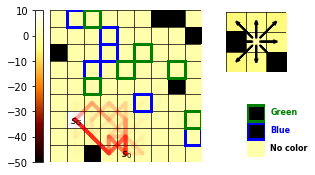

In [13]:
#print(c)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_mca, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)




In [14]:
mca.__dict__


{'s1': <mc.system1.System1Solver at 0x129625c88>,
 's2': <mc.system2.System2Solver at 0x12950bf28>,
 'modelSelf': <mc.self.ModelSelf at 0x1295c3780>,
 'n_tra_threshold': 100,
 'usage_s1': 629,
 'usage_s2': 207}

In [15]:
from max_ent.utility.support import *

temp_matrix_c, avg_length, avg_reward, avg_reward_n, avg_violated, counters = count_states(demo_c.trajectories, n, c_cfg.mdp, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})

temp_matrix_mca, avg_length, avg_reward, avg_reward_n, avg_violated, counters = count_states(demo_mca.trajectories, n, c_cfg.mdp, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})

js_divergence(temp_matrix_c,temp_matrix_mca)

array([0.45846473])

In [16]:
counters

(0.03, 0.01, 0.02, 0.01)